### 迁移学习方法
* 1.卷积网络的微调：代替随机初始化，我们使用经过预训练的网络初始化网络，
例如在 imagenet 1000 数据集上进行训练的网络。 其余的训练照常进行。
* 2.作为固定特征提取器的 ConvNet：在这里，我们将冻结除最终全连接层之外的所有网络的权重。 
最后一个全连接层将替换为具有随机权重的新层，并且仅训练该层。

In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()

#### 加载数据
* 为蚂蚁和蜜蜂提供了大约 120 张训练图像。 每个类别有 75 个验证图像。 
* 通常，如果从头开始训练的话，这是一个非常小的数据集。 由于我们正在使用迁移学习，因此我们应该能够很好地概括。

In [8]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "val":transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = "data/hymenoptera_data"
image_datasets = {x:datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ["train", "val"]}
dataloaders = {x:torch.utils.data.DataLoader(image_datasets[x], batch_size=4, 
                                             shuffle=True, num_workers=4) 
               for x in['train','val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#### 可视化数据

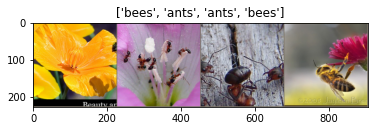

In [10]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    
inputs, classes = next(iter(dataloaders['train']))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

#### 训练模型

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch{}/{}'.format(epoch, num_epochs -1))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corects = 0
            
        for inputs, labels in dataloaders[phase]:
            